### Importing important libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Reading the File

In [2]:
df=pd.read_excel("E:\Project_dataset\Air\AirQualityUCI.xlsx")

### Displaying the first 5 and last 5 records from the DataFrame


In [3]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


### To simplify the model and focus on the most relevant features for predicting air quality, I removed the 'Date' and 'Time' columns

In [4]:
df.drop('Date',axis=1,inplace=True)
df.drop('Time',axis=1,inplace=True)

### For each column, print the column name followed by its unique value counts.

In [5]:
for i in df:
    uni=df[i].value_counts()
    print(i,':-',uni)
    print("=========================================================================")

CO(GT) :- -200.0    1683
 1.0       305
 1.4       279
 1.6       275
 1.5       273
          ... 
 9.9         1
 7.6         1
 9.3         1
 7.0         1
 8.5         1
Name: CO(GT), Length: 97, dtype: int64
PT08.S1(CO) :- -200.000000     366
 1099.500000     12
 954.250000      12
 986.750000      12
 888.000000      11
               ... 
 808.000000       1
 834.333333       1
 891.666667       1
 748.500000       1
 1314.250000      1
Name: PT08.S1(CO), Length: 3246, dtype: int64
NMHC(GT) :- -200    8443
 66       14
 40        9
 29        9
 88        8
        ... 
 422       1
 424       1
 339       1
 445       1
 307       1
Name: NMHC(GT), Length: 430, dtype: int64
C6H6(GT) :- -200.000000    366
 6.849892       13
 10.184263       9
 5.560496        9
 4.045717        9
              ... 
 26.798408       1
 18.833976       1
 21.837693       1
 21.275833       1
 1.307608        1
Name: C6H6(GT), Length: 3773, dtype: int64
PT08.S2(NMHC) :- -200.000000     366
 850.25

### The dataset's documentation says -200 means missing data.

In [6]:
df.replace(-200, np.nan, inplace=True) 

### NMHC(GT) :- -200  count 8443 (90% missing data that why i have drop this column)

In [7]:
df.drop('NMHC(GT)',axis=1,inplace=True)

### Calculate and display the total number of missing values (NaNs) for each column in the DataFrame 'df'.

In [8]:
df.isna().sum()

CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [9]:
df_cleaned=df.dropna()

In [10]:
df_cleaned.isna().sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

### The new names are more descriptive

In [11]:
df_cleaned.columns=['CO Conc. (mg/m^3)','Tin Oxide Sensor (CO)','Benzene Conc.','Titania Sensor (NMHC)','NOx Conc. (ppb)','Tungsten Oxide Sensor (NOx)','NO2 Conc. (µg/m^3)','Tungsten Oxide Sensor (NO2)','Indium Oxide Sensor (O3)','Temperature (°C)','Relative Humidity (%)','Absolute Humidity']

### Summary of a DataFrame's columns, including data types and non-null values. 

In [12]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6941 entries, 0 to 9356
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CO Conc. (mg/m^3)            6941 non-null   float64
 1   Tin Oxide Sensor (CO)        6941 non-null   float64
 2   Benzene Conc.                6941 non-null   float64
 3   Titania Sensor (NMHC)        6941 non-null   float64
 4   NOx Conc. (ppb)              6941 non-null   float64
 5   Tungsten Oxide Sensor (NOx)  6941 non-null   float64
 6   NO2 Conc. (µg/m^3)           6941 non-null   float64
 7   Tungsten Oxide Sensor (NO2)  6941 non-null   float64
 8   Indium Oxide Sensor (O3)     6941 non-null   float64
 9   Temperature (°C)             6941 non-null   float64
 10  Relative Humidity (%)        6941 non-null   float64
 11  Absolute Humidity            6941 non-null   float64
dtypes: float64(12)
memory usage: 704.9 KB


### Calculates the total number of missing values (NaNs) in each column

In [13]:
df_cleaned.isnull().sum()

CO Conc. (mg/m^3)              0
Tin Oxide Sensor (CO)          0
Benzene Conc.                  0
Titania Sensor (NMHC)          0
NOx Conc. (ppb)                0
Tungsten Oxide Sensor (NOx)    0
NO2 Conc. (µg/m^3)             0
Tungsten Oxide Sensor (NO2)    0
Indium Oxide Sensor (O3)       0
Temperature (°C)               0
Relative Humidity (%)          0
Absolute Humidity              0
dtype: int64

### Counts the number of duplicate rows

In [14]:
df_cleaned.duplicated().sum()

0

### Removes duplicate rows from the DataFrame to reduce data redundancy

In [15]:
df_cleaned.drop_duplicates(inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3816\1556128341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop_duplicates(inplace=True)


### create a box plot for each column to visually inspect the distribution and identify outliers

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


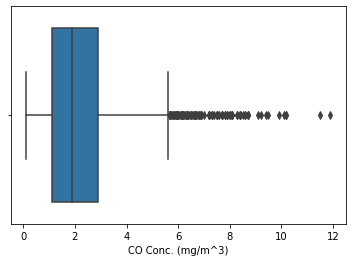

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


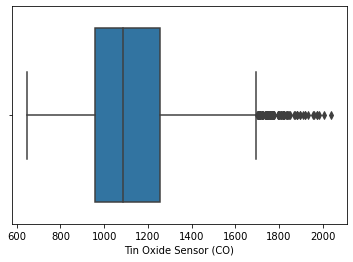

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


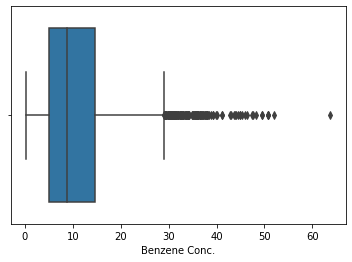

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


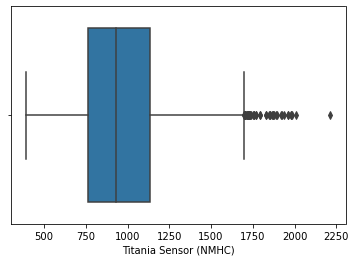

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


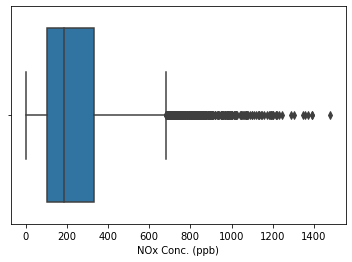

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


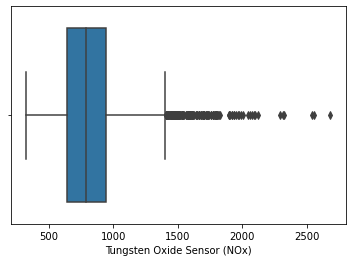

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


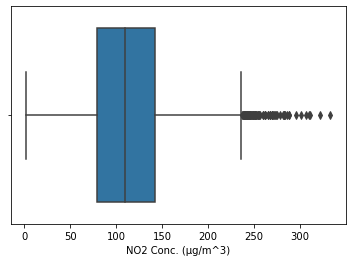

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


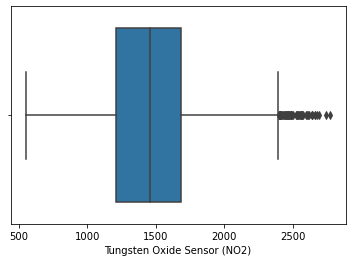

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


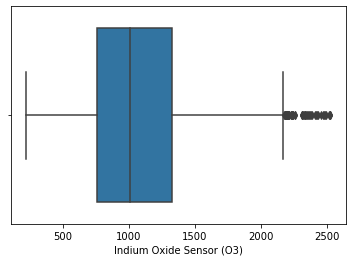

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


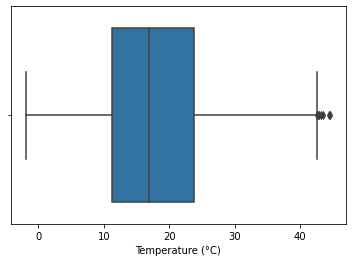

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


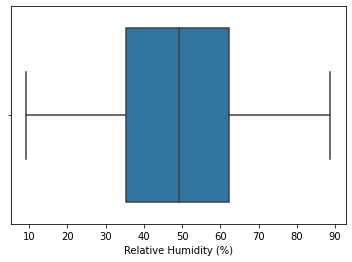

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


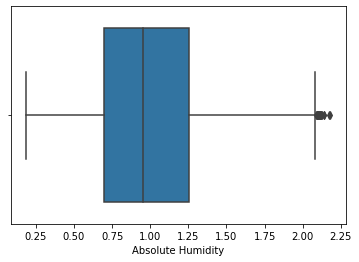

In [16]:
for col in df_cleaned:
    sns.boxplot(df_cleaned[col])
    plt.show()

### function for Replace outliers with lower or upper bounds.

In [17]:
def outliers(value):
    if value < lower_bound:
        return lower_bound
    
    elif value > upper_bound:
        return upper_bound
    
    else:
        return value

In [18]:
Q1 = df_cleaned['CO Conc. (mg/m^3)'].quantile(0.25)
Q3 = df_cleaned['CO Conc. (mg/m^3)'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df_cleaned['CO Conc. (mg/m^3)'] = df_cleaned['CO Conc. (mg/m^3)'].apply(outliers)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3816\601301972.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['CO Conc. (mg/m^3)'] = df_cleaned['CO Conc. (mg/m^3)'].apply(outliers)


In [19]:
Q1 = df_cleaned['Tin Oxide Sensor (CO)'].quantile(0.25)
Q3 = df_cleaned['Tin Oxide Sensor (CO)'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
    
df_cleaned['Tin Oxide Sensor (CO)'] = df_cleaned['Tin Oxide Sensor (CO)'].apply(outliers)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3816\109059260.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Tin Oxide Sensor (CO)'] = df_cleaned['Tin Oxide Sensor (CO)'].apply(outliers)


In [20]:
Q1 = df_cleaned['Benzene Conc.'].quantile(0.25)
Q3 = df_cleaned['Benzene Conc.'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
    
df_cleaned['Benzene Conc.'] = df_cleaned['Benzene Conc.'].apply(outliers)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3816\2498899614.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Benzene Conc.'] = df_cleaned['Benzene Conc.'].apply(outliers)


In [21]:
Q1 = df_cleaned['Titania Sensor (NMHC)'].quantile(0.25)
Q3 = df_cleaned['Titania Sensor (NMHC)'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
    
df_cleaned['Titania Sensor (NMHC)'] = df_cleaned['Titania Sensor (NMHC)'].apply(outliers)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3816\208588163.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Titania Sensor (NMHC)'] = df_cleaned['Titania Sensor (NMHC)'].apply(outliers)


In [22]:
Q1 = df_cleaned['NOx Conc. (ppb)'].quantile(0.25)
Q3 = df_cleaned['NOx Conc. (ppb)'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
    
df_cleaned['NOx Conc. (ppb)'] = df_cleaned['NOx Conc. (ppb)'].apply(outliers)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3816\1428323993.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['NOx Conc. (ppb)'] = df_cleaned['NOx Conc. (ppb)'].apply(outliers)


In [23]:
Q1 = df_cleaned['Tungsten Oxide Sensor (NOx)'].quantile(0.25)
Q3 = df_cleaned['Tungsten Oxide Sensor (NOx)'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df_cleaned['Tungsten Oxide Sensor (NOx)'] = df_cleaned['Tungsten Oxide Sensor (NOx)'].apply(outliers)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3816\3699246432.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Tungsten Oxide Sensor (NOx)'] = df_cleaned['Tungsten Oxide Sensor (NOx)'].apply(outliers)


In [24]:
Q1 = df_cleaned['Tungsten Oxide Sensor (NO2)'].quantile(0.25)
Q3 = df_cleaned['Tungsten Oxide Sensor (NO2)'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df_cleaned['Tungsten Oxide Sensor (NO2)'] = df_cleaned['Tungsten Oxide Sensor (NO2)'].apply(outliers)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3816\2600381567.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Tungsten Oxide Sensor (NO2)'] = df_cleaned['Tungsten Oxide Sensor (NO2)'].apply(outliers)


In [25]:
Q1 = df_cleaned['Indium Oxide Sensor (O3)'].quantile(0.25)
Q3 = df_cleaned['Indium Oxide Sensor (O3)'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df_cleaned['Indium Oxide Sensor (O3)'] = df_cleaned['Indium Oxide Sensor (O3)'].apply(outliers)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3816\1552698958.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Indium Oxide Sensor (O3)'] = df_cleaned['Indium Oxide Sensor (O3)'].apply(outliers)


In [26]:
Q1 = df_cleaned['Temperature (°C)'].quantile(0.25)
Q3 = df_cleaned['Temperature (°C)'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df_cleaned['Temperature (°C)'] = df_cleaned['Temperature (°C)'].apply(outliers)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3816\2955581625.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Temperature (°C)'] = df_cleaned['Temperature (°C)'].apply(outliers)


In [27]:
Q1 = df_cleaned['Relative Humidity (%)'].quantile(0.25)
Q3 = df_cleaned['Relative Humidity (%)'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df_cleaned['Relative Humidity (%)'] = df_cleaned['Relative Humidity (%)'].apply(outliers)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3816\1255582617.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Relative Humidity (%)'] = df_cleaned['Relative Humidity (%)'].apply(outliers)


In [28]:
Q1 = df_cleaned['NO2 Conc. (µg/m^3)'].quantile(0.25)
Q3 = df_cleaned['NO2 Conc. (µg/m^3)'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df_cleaned['NO2 Conc. (µg/m^3)'] = df_cleaned['NO2 Conc. (µg/m^3)'].apply(outliers)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3816\1472108660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['NO2 Conc. (µg/m^3)'] = df_cleaned['NO2 Conc. (µg/m^3)'].apply(outliers)


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


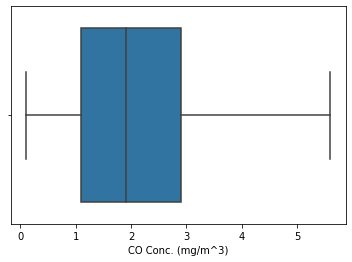

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


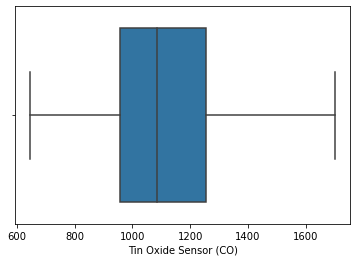

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


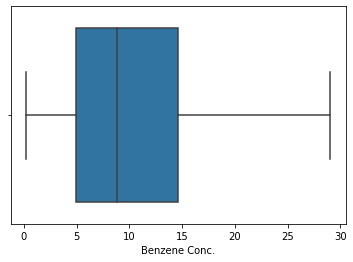

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


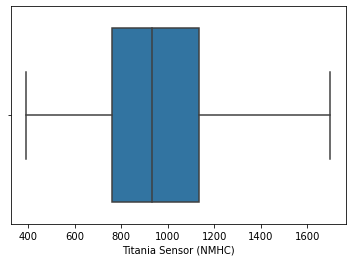

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


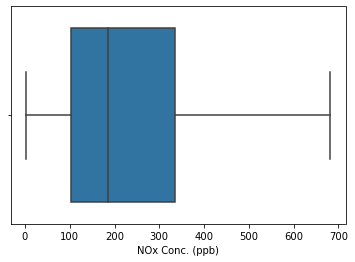

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


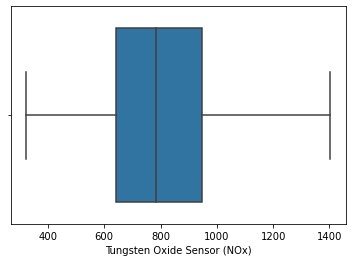

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


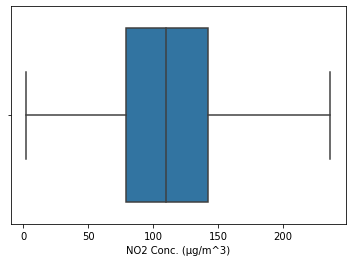

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


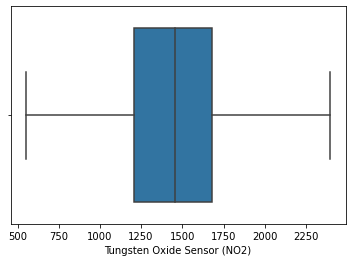

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


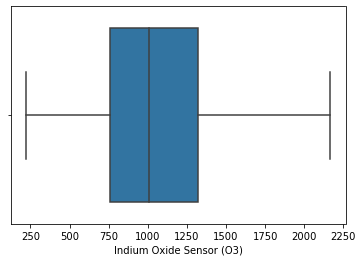

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


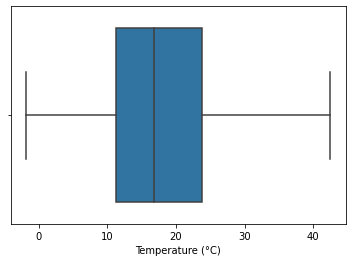

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


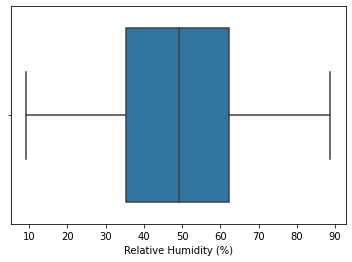

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


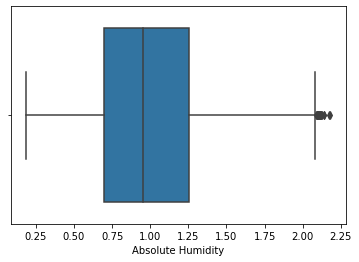

In [29]:
for col in df_cleaned:
    sns.boxplot(df_cleaned[col])
    plt.show()

###  Visualize relationships between features and 'Absolute Humidity' using scatter plots with regression lines.

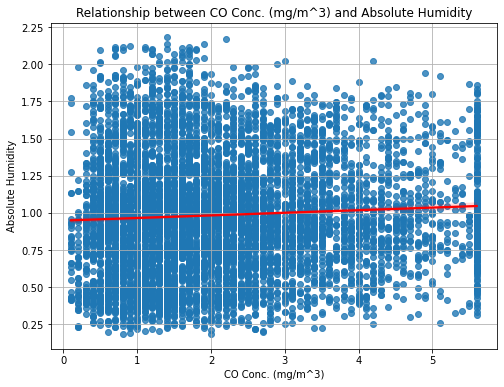

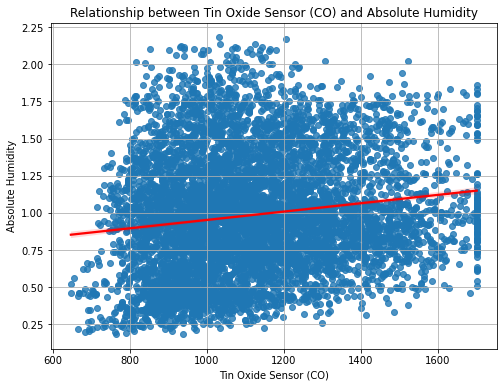

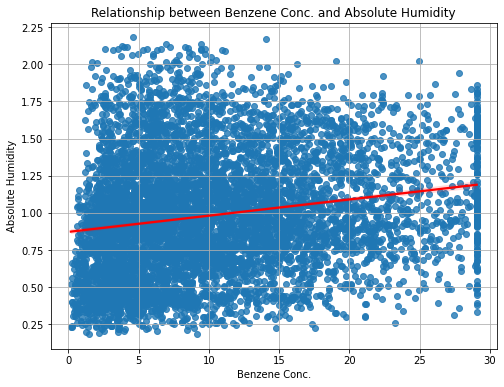

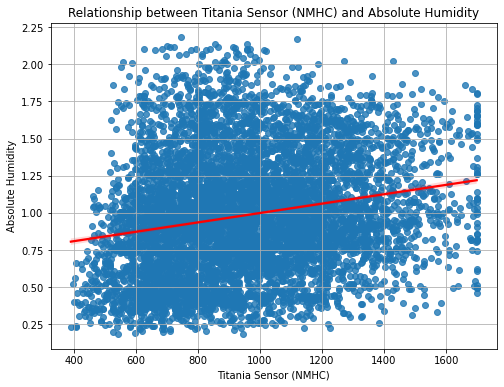

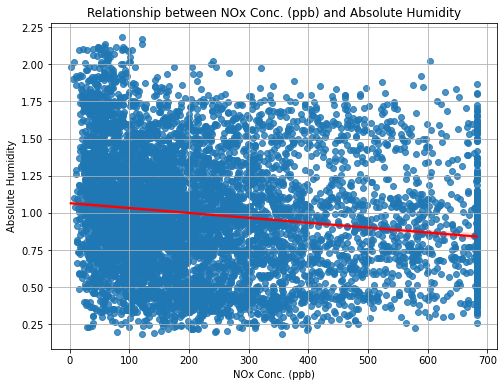

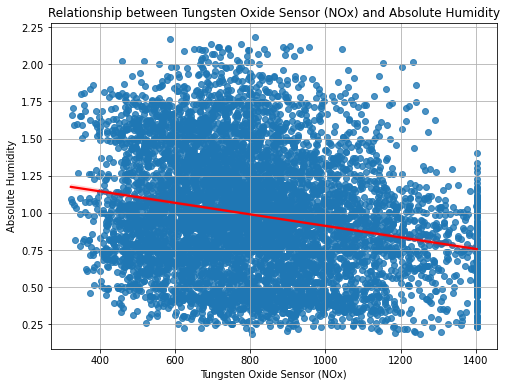

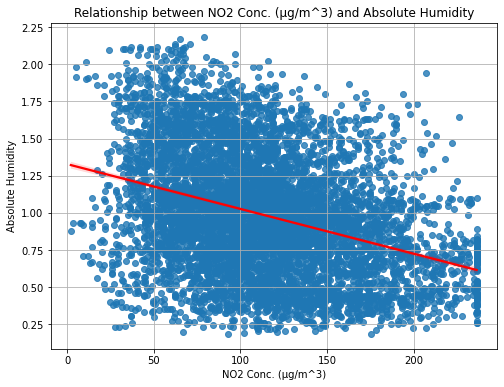

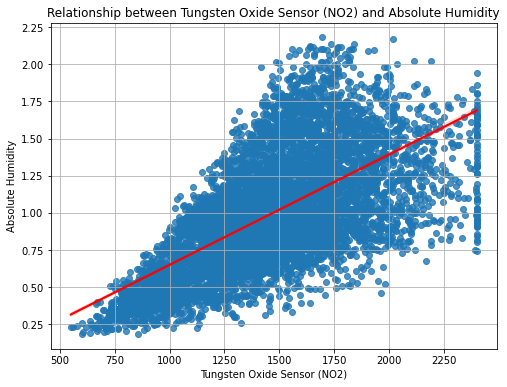

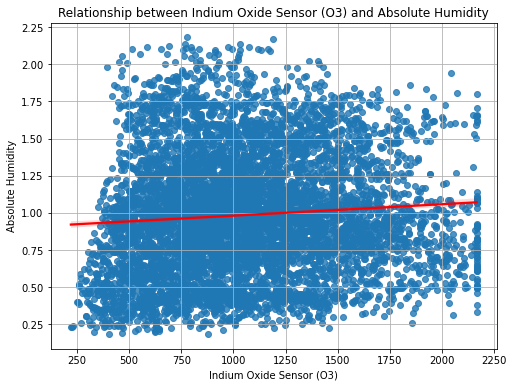

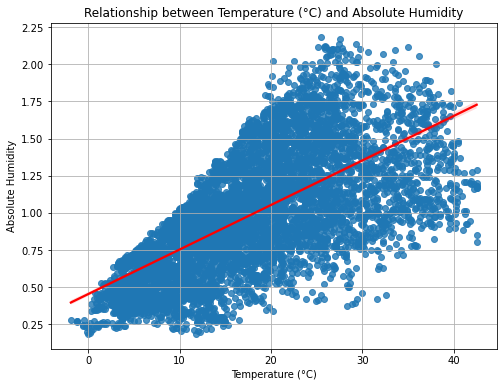

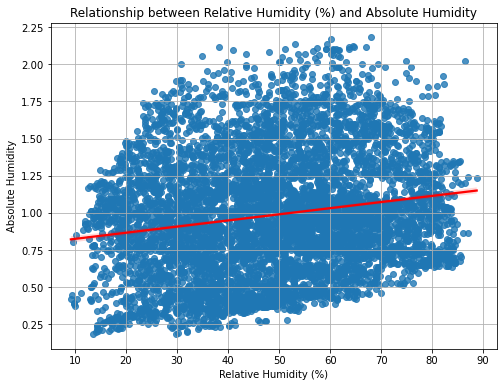

In [30]:
for column in df_cleaned.columns:
    if column != 'Absolute Humidity':
        plt.figure(figsize=(8, 6))
        sns.regplot(x=df_cleaned[column], y=df_cleaned['Absolute Humidity'], line_kws={"color":"red"})
        plt.title(f'Relationship between {column} and Absolute Humidity')
        plt.xlabel(column)
        plt.ylabel('Absolute Humidity')
        plt.grid(True)
        plt.show()

### Correlation matrix to analyze relationships between features.

In [31]:
df_cleaned.corr()

,CO Conc. (mg/m^3),Tin Oxide Sensor (CO),Benzene Conc.,Titania Sensor (NMHC),NOx Conc. (ppb),Tungsten Oxide Sensor (NOx),NO2 Conc. (µg/m^3),Tungsten Oxide Sensor (NO2),Indium Oxide Sensor (O3),Temperature (°C),Relative Humidity (%),Absolute Humidity
CO Conc. (mg/m^3),1.000000,0.880790,0.932160,0.921996,0.781494,-0.753967,0.691656,0.628958,0.861727,0.025366,0.056105,0.058106
Tin Oxide Sensor (CO),0.880790,1.000000,0.882106,0.886397,0.711510,-0.799125,0.634608,0.671890,0.898443,0.029143,0.169933,0.150829
Benzene Conc.,0.932160,0.882106,1.000000,0.988587,0.711189,-0.776676,0.619498,0.764373,0.869126,0.201998,-0.031901,0.190123
Titania Sensor (NMHC),0.921996,0.886397,0.988587,1.000000,0.707161,-0.813585,0.639007,0.772933,0.877543,0.230959,-0.048500,0.205954
NOx Conc. (ppb),0.781494,0.711510,0.711189,0.707161,1.000000,-0.730898,0.773677,0.217273,0.795447,-0.281533,0.230748,-0.149547
Tungsten Oxide Sensor (NOx),-0.753967,-0.799125,-0.776676,-0.813585,-0.730898,1.000000,-0.669006,-0.523655,-0.828716,-0.089522,-0.129309,-0.223610
NO2 Conc. (µg/m^3),0.691656,0.634608,0.619498,0.639007,0.773677,-0.669006,1.000000,0.144078,0.705393,-0.211047,-0.079359,-0.349683
Tungsten Oxide Sensor (NO2),0.628958,0.671890,0.764373,0.772933,0.217273,-0.523655,0.144078,1.000000,0.573523,0.570669,-0.010267,0.649336
Indium Oxide Sensor (O3),0.861727,0.898443,0.869126,0.877543,0.795447,-0.828716,0.705393,0.573523,1.000000,-0.045316,0.165385,0.077428
Temperature (°C),0.025366,0.029143,0.201998,0.230959,-0.281533,-0.089522,-0.211047,0.570669,-0.045316,1.000000,-0.563780,0.660882


### Calculates skewness of each column to see the distribution of data

In [32]:
for col in df_cleaned:
    print(col,":",df_cleaned[col].skew())

CO Conc. (mg/m^3) : 0.8511234140732225
Tin Oxide Sensor (CO) : 0.5902523878219851
Benzene Conc. : 0.8715879961112712
Titania Sensor (NMHC) : 0.4363983063117845
NOx Conc. (ppb) : 1.029557177559583
Tungsten Oxide Sensor (NOx) : 0.5560136849786966
NO2 Conc. (µg/m^3) : 0.45507762812345304
Tungsten Oxide Sensor (NO2) : 0.1382712537905186
Indium Oxide Sensor (O3) : 0.49828064762456875
Temperature (°C) : 0.39652268160101983
Relative Humidity (%) : -0.010523155483425922
Absolute Humidity : 0.35777716429648554


### Split the cleaned DataFrame into features (X) and target variable (y)

In [33]:
X=df_cleaned.drop('Absolute Humidity',axis=1)
y=df_cleaned['Absolute Humidity']

### Check for multicollinearity among features using the correlation matrix.


In [34]:
X.corr()

,CO Conc. (mg/m^3),Tin Oxide Sensor (CO),Benzene Conc.,Titania Sensor (NMHC),NOx Conc. (ppb),Tungsten Oxide Sensor (NOx),NO2 Conc. (µg/m^3),Tungsten Oxide Sensor (NO2),Indium Oxide Sensor (O3),Temperature (°C),Relative Humidity (%)
CO Conc. (mg/m^3),1.000000,0.880790,0.932160,0.921996,0.781494,-0.753967,0.691656,0.628958,0.861727,0.025366,0.056105
Tin Oxide Sensor (CO),0.880790,1.000000,0.882106,0.886397,0.711510,-0.799125,0.634608,0.671890,0.898443,0.029143,0.169933
Benzene Conc.,0.932160,0.882106,1.000000,0.988587,0.711189,-0.776676,0.619498,0.764373,0.869126,0.201998,-0.031901
Titania Sensor (NMHC),0.921996,0.886397,0.988587,1.000000,0.707161,-0.813585,0.639007,0.772933,0.877543,0.230959,-0.048500
NOx Conc. (ppb),0.781494,0.711510,0.711189,0.707161,1.000000,-0.730898,0.773677,0.217273,0.795447,-0.281533,0.230748
Tungsten Oxide Sensor (NOx),-0.753967,-0.799125,-0.776676,-0.813585,-0.730898,1.000000,-0.669006,-0.523655,-0.828716,-0.089522,-0.129309
NO2 Conc. (µg/m^3),0.691656,0.634608,0.619498,0.639007,0.773677,-0.669006,1.000000,0.144078,0.705393,-0.211047,-0.079359
Tungsten Oxide Sensor (NO2),0.628958,0.671890,0.764373,0.772933,0.217273,-0.523655,0.144078,1.000000,0.573523,0.570669,-0.010267
Indium Oxide Sensor (O3),0.861727,0.898443,0.869126,0.877543,0.795447,-0.828716,0.705393,0.573523,1.000000,-0.045316,0.165385
Temperature (°C),0.025366,0.029143,0.201998,0.230959,-0.281533,-0.089522,-0.211047,0.570669,-0.045316,1.000000,-0.563780


###  Split data into training and testing sets.

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

### Import Linear Regression model

In [36]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

### Train the linear regression model.

In [37]:
lr.fit(x_train,y_train)

LinearRegression()

### Make predictions on the test set.

In [38]:
y_pred=lr.predict(x_test)

In [39]:
residuals = y_test - y_pred

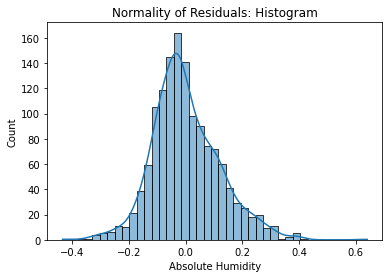

In [40]:
import seaborn as sns

sns.histplot(residuals, kde=True)
plt.title("Normality of Residuals: Histogram")
plt.show()


### Linear Regression

In [41]:
def train_model_lr():
    from sklearn.linear_model import LinearRegression
    model=LinearRegression()
    model.fit(x_train,y_train)
    return model,"lr"

### KNneart Neghibour

In [42]:
def train_model_KNN():
    from sklearn.neighbors import KNeighborsRegressor
    model=KNeighborsRegressor(n_neighbors=5)
    model.fit(x_train,y_train)
    return model,"knn"

### Decission Tree

In [43]:
def train_model_Dt():
    from sklearn.tree import DecisionTreeRegressor
    model=DecisionTreeRegressor()
    model.fit(x_train,y_train)
    return model,"DT"

### Random Forest

In [44]:
def train_model_randomforest():
    from sklearn.ensemble import RandomForestRegressor
    model=RandomForestRegressor(n_estimators=100,random_state=42)
    model.fit(x_train,y_train)
    return model,"random forest"

### Prepare the models list

In [45]:
models=[train_model_lr(),train_model_KNN(),train_model_Dt(),train_model_randomforest()]

### Evaluate the the model as per score

In [46]:
def evaluate_regression_model(model, model_name):
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    import numpy as np

    y_predict = model.predict(x_test)

    mae = mean_absolute_error(y_test, y_predict)*100
    mse = mean_squared_error(y_test, y_predict)*100
    r2 = r2_score(y_test, y_predict)*100

    return model_name, mae, mse, r2


In [47]:
rows=[]
for (model,model_name) in models:
    rows.append(evaluate_regression_model(model,model_name))

In [48]:
df2=pd.DataFrame(rows,columns=["Algorithm","mae","mse","r2"])
df2

,Algorithm,mae,mse,r2
0,lr,9.082399,1.395388,91.361644
1,knn,7.921599,1.195513,92.599001
2,DT,2.316464,0.119529,99.260038
3,random forest,0.973948,0.029144,99.819579


In [49]:
import pickle

with open('vastu_model.pkl', 'wb') as f:
    pickle.dump(lr, f)

print("Model saved as 'vastu_model.pkl'")

Model saved as 'vastu_model.pkl'
